In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rapporti_lavoro_attivati_df = pd.read_csv("datasets/Rapporti_di_lavoro_attivati.csv")
rapporti_lavoro_attivati_df.head(10)

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
5,06/08/2021,M,16,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
6,04/03/2018,F,56,Confezioni di abbigliamento sportivo o di altr...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIA
7,06/10/2011,M,20,Demolizione,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE,TEMPO PIENO,BERGAMO,ITALIA
8,03/07/2013,M,49,Demolizione,LICENZA MEDIA,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
9,03/06/2014,M,29,Ristorazione con somministrazione,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ERITREA


### Checking for missing values

In [3]:
(rapporti_lavoro_attivati_df.isnull()).any()

DATA                         False
GENERE                       False
ETA                          False
SETTOREECONOMICODETTAGLIO     True
TITOLOSTUDIO                  True
CONTRATTO                    False
MODALITALAVORO                True
PROVINCIAIMPRESA             False
ITALIANO                     False
dtype: bool

##### In all the datasets there are some missing values in the "SETTOREECONOMICODETTAGLIO", "TITOLOSTUDIO" and "MODALITALAVORO" columns

In [4]:
rapporti_lavoro_attivati_df.dtypes

DATA                         object
GENERE                       object
ETA                           int64
SETTOREECONOMICODETTAGLIO    object
TITOLOSTUDIO                 object
CONTRATTO                    object
MODALITALAVORO               object
PROVINCIAIMPRESA             object
ITALIANO                     object
dtype: object

#### Checking if some columns contain missing values and counting the number of missing values for each column 

In [5]:
#Checking if some column contains missing values
for column in rapporti_lavoro_attivati_df.columns:
    print(f'{column} --> {(rapporti_lavoro_attivati_df[column].isnull()).any()}')

#Checking the type of the column
print('\n\n')
print(rapporti_lavoro_attivati_df.dtypes)
print('\n\n')

#counting missing values for column 'SETTOREECONOMICODETTAGLIO'
count = 0
for x in rapporti_lavoro_attivati_df['SETTOREECONOMICODETTAGLIO']:
    if type(x) is not str:
        count += 1
print(f"missing values for column 'SETTOREECONOMICODETTAGLIO': {count}")

#counting missing values for column 'TITOLOSTUDIO'
count = 0
for x in rapporti_lavoro_attivati_df['TITOLOSTUDIO']:
    if type(x) is not str:
        count += 1
print(f"missing values for column 'TITOLOSTUDIO': {count}")

#counting missing values for column 'MODALITALAVORO'
count = 0
for x in rapporti_lavoro_attivati_df['MODALITALAVORO']:
    if type(x) is not str:
        count += 1
print(f"missing values for column 'MODALITALAVORO': {count}")

DATA --> False
GENERE --> False
ETA --> False
SETTOREECONOMICODETTAGLIO --> True
TITOLOSTUDIO --> True
CONTRATTO --> False
MODALITALAVORO --> True
PROVINCIAIMPRESA --> False
ITALIANO --> False



DATA                         object
GENERE                       object
ETA                           int64
SETTOREECONOMICODETTAGLIO    object
TITOLOSTUDIO                 object
CONTRATTO                    object
MODALITALAVORO               object
PROVINCIAIMPRESA             object
ITALIANO                     object
dtype: object



missing values for column 'SETTOREECONOMICODETTAGLIO': 2888
missing values for column 'TITOLOSTUDIO': 580
missing values for column 'MODALITALAVORO': 440779


#### Dropping missing values, since the number is low 

In [6]:
rapporti_lavoro_attivati_df.shape

(9579794, 9)

In [7]:
#Removing rows that contain missing values
columns = ['SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'MODALITALAVORO']

for column in columns:
    for index, x in enumerate(rapporti_lavoro_attivati_df[column]):
        if type(x) is not str:
            rapporti_lavoro_attivati_df.at[index, column] = np.nan

rapporti_lavoro_attivati_df.dropna(axis = 0, inplace=True)

In [8]:
rapporti_lavoro_attivati_df.shape

(9135924, 9)

#### There are no more missing values 

In [9]:
for column in rapporti_lavoro_attivati_df.columns:
    print(f'{column} --> {(rapporti_lavoro_attivati_df[column].isnull()).any()}')

DATA --> False
GENERE --> False
ETA --> False
SETTOREECONOMICODETTAGLIO --> False
TITOLOSTUDIO --> False
CONTRATTO --> False
MODALITALAVORO --> False
PROVINCIAIMPRESA --> False
ITALIANO --> False


### Aggregating values 

In [10]:
rapporti_lavoro_attivati_df['MODALITALAVORO'].value_counts()

TEMPO PIENO                   5335584
TEMPO PARZIALE ORIZZONTALE    2025706
NON DEFINITO                  1087133
TEMPO PARZIALE MISTO           445384
TEMPO PARZIALE VERTICALE       242117
Name: MODALITALAVORO, dtype: int64

#### Since there less rows with 'NON DEFINITO', 'TEMPO PARZIALE MISTO' and 'TEMPO PARZIALE VERTICALE' compared to 'TEMPO PIENO', these categories need to be aggregate

In [11]:
categories = {
    'TEMPO PIENO': 'TEMPO PIENO',
    'TEMPO PARZIALE ORIZZONTALE': 'TEMPO PARZIALE',
    'NON DEFINITO': 'TEMPO PARZIALE',
    'TEMPO PARZIALE MISTO': 'TEMPO PARZIALE',
    'TEMPO PARZIALE VERTICALE': 'TEMPO PARZIALE',
}

rapporti_lavoro_attivati_df['MODALITALAVORO'] = [categories[x] for x in rapporti_lavoro_attivati_df['MODALITALAVORO']]
rapporti_lavoro_attivati_df['MODALITALAVORO'].value_counts()

TEMPO PIENO       5335584
TEMPO PARZIALE    3800340
Name: MODALITALAVORO, dtype: int64

#### Another aggregation can be made by the age of the people 

In [12]:
rapporti_lavoro_attivati_df.shape

(9135924, 9)

In [13]:
count = 0
for x in rapporti_lavoro_attivati_df['ETA']:
    if x < 20 or x > 59 :
        count += 1
print(f"Number of people that started a job with age<20 or age>59: {count}")

Number of people that started a job with age<20 or age>59: 697091


In [14]:
rapporti_lavoro_attivati_df.drop(
    rapporti_lavoro_attivati_df[(rapporti_lavoro_attivati_df.ETA < 20) | (rapporti_lavoro_attivati_df.ETA > 59)].index,
    inplace=True)

In [15]:
rapporti_lavoro_attivati_df.shape

(8438833, 9)

In [16]:
category_20_29 = {
    20: '20-29',
    21: '20-29',
    22: '20-29',
    23: '20-29',
    24: '20-29',
    25: '20-29',
    26: '20-29',
    27: '20-29',
    28: '20-29',
    29: '20-29',
}
category_30_39 = {
    30: '30-39',
    31: '30-39',
    32: '30-39',
    33: '30-39',
    34: '30-39',
    35: '30-39',
    36: '30-39',
    37: '30-39',
    38: '30-39',
    39: '30-39',
}
category_40_49 = {
    40: '40-49',
    41: '40-49',
    42: '40-49',
    43: '40-49',
    44: '40-49',
    45: '40-49',
    46: '40-49',
    47: '40-49',
    48: '40-49',
    49: '40-49',
}
category_50_59 = {
    50: '50-59',
    51: '50-59',
    52: '50-59',
    53: '50-59',
    54: '50-59',
    55: '50-59',
    56: '50-59',
    57: '50-59',
    58: '50-59',
    59: '50-59',
}
categories = dict(category_20_29)
categories.update(category_30_39)
categories.update(category_40_49)
categories.update(category_50_59)

rapporti_lavoro_attivati_df['ETA'] = [categories[x] for x in rapporti_lavoro_attivati_df['ETA']]
rapporti_lavoro_attivati_df['ETA'].value_counts()

20-29    3082611
30-39    2418417
40-49    1919532
50-59    1018273
Name: ETA, dtype: int64

In [17]:
print(rapporti_lavoro_attivati_df.dtypes)

DATA                         object
GENERE                       object
ETA                          object
SETTOREECONOMICODETTAGLIO    object
TITOLOSTUDIO                 object
CONTRATTO                    object
MODALITALAVORO               object
PROVINCIAIMPRESA             object
ITALIANO                     object
dtype: object


In [18]:
rapporti_lavoro_attivati_df['SETTOREECONOMICODETTAGLIO'].value_counts()

Alberghi                                                                                                                                                                           426040
Ristorazione con somministrazione                                                                                                                                                  384304
Attività di produzione cinematografica, di video e di programmi televisivi                                                                                                         348784
Attività di famiglie e convivenze come datori di lavoro per personale domestico                                                                                                    318850
Altri servizi di supporto alle imprese nca                                                                                                                                         278226
                                                                      

### Data distribution 

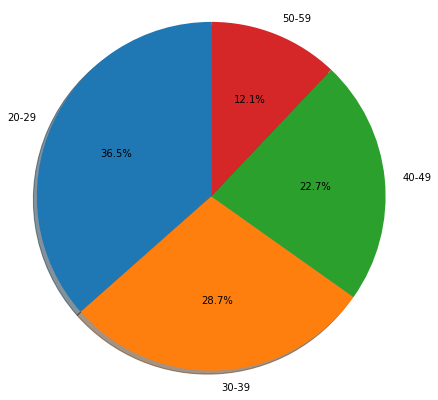

In [19]:
freq_table = rapporti_lavoro_attivati_df.ETA.value_counts()
xaxis = freq_table.index
value = freq_table.values
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [20]:
table = rapporti_lavoro_attivati_df['ITALIANO'].value_counts().to_dict()
print(table)

{'ITALIA': 6336609, 'ROMANIA': 345083, 'EGITTO': 162016, 'ALBANIA': 160080, 'MAROCCO': 150348, 'Cinese, Repubblica Popolare': 118815, 'INDIA': 89900, 'SENEGAL': 83915, 'PAKISTAN': 83250, "PERU'": 80276, 'UCRAINA': 78277, 'FILIPPINE': 70041, 'ECUADOR': 64886, 'SRI LANKA': 54334, 'BANGLADESH': 43215, 'Moldova': 39677, 'TUNISIA': 31341, 'NIGERIA': 27396, 'GHANA': 22873, 'BRASILE': 21743, "COSTA D'AVORIO": 21580, 'EL SALVADOR': 19885, 'BULGARIA': 19506, 'KOSOVO': 17339, 'BOLIVIA': 17312, 'POLONIA': 16144, 'Dominicana, Repubblica': 11961, 'SPAGNA': 11389, 'RUSSA, Federazione': 11036, 'CUBA': 10707, 'COLOMBIA': 9172, 'BURKINA FASO': 8996, 'TURCHIA': 8824, 'FRANCIA': 8338, 'REGNO UNITO': 8188, 'CAMERUN': 8096, 'MACEDONIA, ex REP. JUGOSLAVIA': 8056, 'SERBIA': 8054, 'GERMANIA': 6345, 'BOSNIA-ERZEGOVINA': 6117, 'CROAZIA': 6067, 'GAMBIA': 5771, 'TOGO': 4930, 'MALI': 4769, 'ALGERIA': 4666, 'UNGHERIA': 4647, 'ERITREA': 4419, 'GUINEA': 4271, 'IRAN': 4143, 'VENEZUELA': 4080, 'GEORGIA': 3817, 'Mauriti

In [21]:
#Aggregate all the nationalities that are under 30'000 count in 'ALTRO'
result = [key for key in table if table[key] > 30000]
print(result) 

for index, x in enumerate(rapporti_lavoro_attivati_df['ITALIANO']):
    if x not in result:
        rapporti_lavoro_attivati_df.at[index, 'ITALIANO'] = 'ALTRO'


['ITALIA', 'ROMANIA', 'EGITTO', 'ALBANIA', 'MAROCCO', 'Cinese, Repubblica Popolare', 'INDIA', 'SENEGAL', 'PAKISTAN', "PERU'", 'UCRAINA', 'FILIPPINE', 'ECUADOR', 'SRI LANKA', 'BANGLADESH', 'Moldova', 'TUNISIA']


KeyboardInterrupt: 

In [ ]:
rapporti_lavoro_attivati_df['ITALIANO'].value_counts() 

In [ ]:
rapporti_lavoro_attivati_df.dtypes